## Data Loading and preprocessing

In [3]:
import pandas as pd

In [4]:
file="C:\\Users\\tejag\\Downloads\\DisneylandReviews.csv"

In [5]:
df = pd.read_csv(file, encoding='utf-8', encoding_errors='ignore')
df.head(20)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


## Importing nltk Package

In [6]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'mightn', 'what', "you're", 'couldn', 'against', 'these', 've', 'she', 'and', "doesn't", 'me', 'you', 'itself', "couldn't", 'y', 'yourselves', 'on', 'themselves', 'only', 'our', 'his', "hadn't", "mustn't", "needn't", "shouldn't", 'this', 'herself', 'does', 'the', "hasn't", 'haven', "you've", 'wouldn', 'that', 'or', 'while', 'during', "isn't", 'how', 'o', 'those', 'off', 'did', 'had', 'will', 'being', 'hers', 's', 'whom', 'won', 'which', 'm', "didn't", 'hadn', 'nor', 'no', "that'll", 'needn', 'same', "won't", 'am', 'more', "should've", 'for', "mightn't", 'of', 'at', 'himself', 'because', 'than', 'ain', 'is', 'after', 'through', 'don', "wouldn't", 'further', 'under', 'can', 'shan', 'yours', 'over', 'here', 'in', 'again', 'yourself', 'ma', "you'll", 'her', 'such', 'be', 'their', 'him', 'above', 'its', 'are', 'a', 'if', 'they', 'ours', 'were', 'up', 'weren', 'before', 'aren', 'an', 'very', 'between', 'other', 'your', 'about', 'didn', 'until', 'from', 'but', 'isn', "weren't", 'we', 'it', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre Processing Pipeline

In [7]:
import regex as re
def tokenize(Reviewer_Location):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Reviewer_Location)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(Reviewer_Location, pipeline):
    tokens = Reviewer_Location
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Reviewer_Location'].apply(prepare, pipeline=pipeline)

## Token Frequency Analysis and Visualization

## Counting The Tokens

In [8]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
united,24652
states,14551
kingdom,9751
australia,4679
canada,2235
india,1511
philippines,1070
singapore,1037
new,757


## Wordclouds

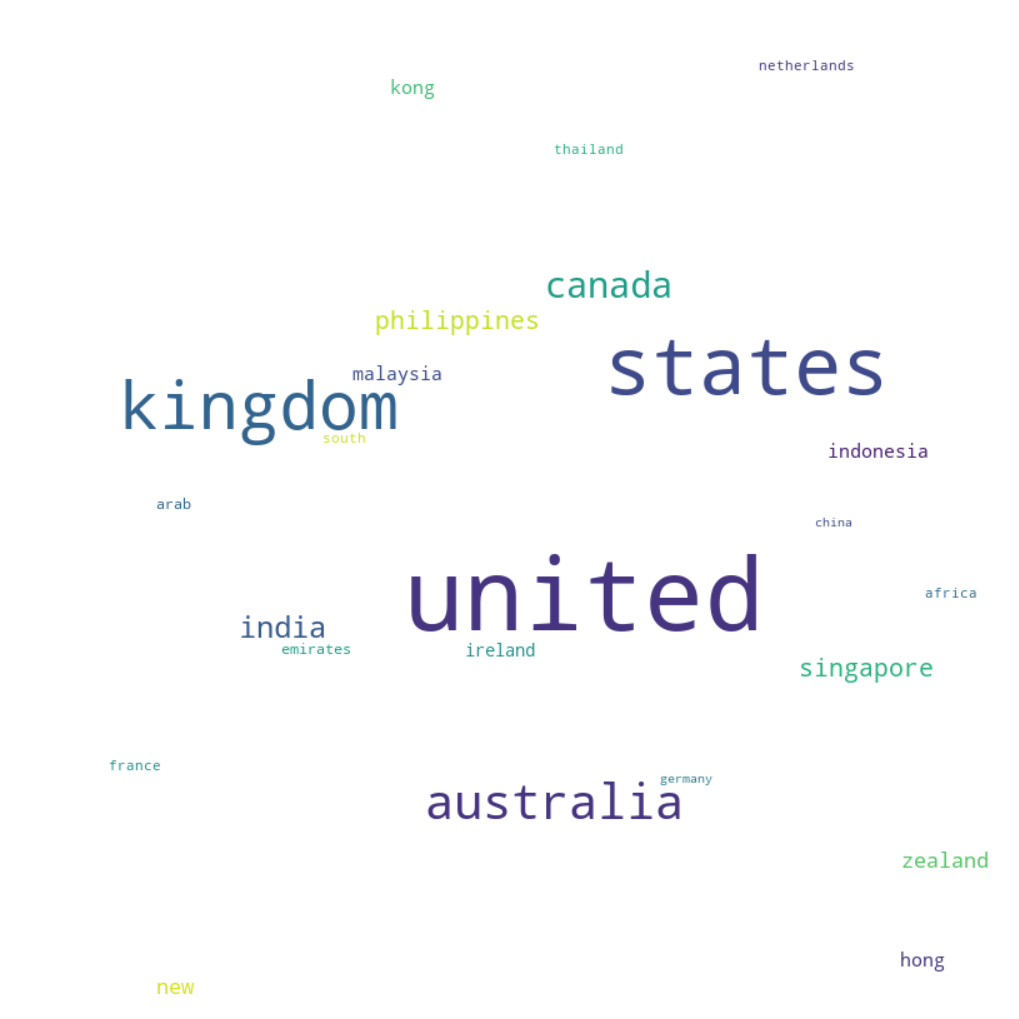

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with desired parameters
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)

# Generate word cloud from the frequency dictionary
wc.generate_from_frequencies(freq_df['freq'])

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')  # Improving interpolation for smoother image
plt.axis("off")
plt.tight_layout(pad=0)

# Saving the word cloud as an image (optional)
# plt.savefig('wordcloud.png', dpi=300)

plt.show()

In [10]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 

In [11]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
united,24652,15982.135923
states,14551,17104.820171
kingdom,9751,15365.607274
australia,4679,10808.880847
canada,2235,6814.351210


## Wordcloud

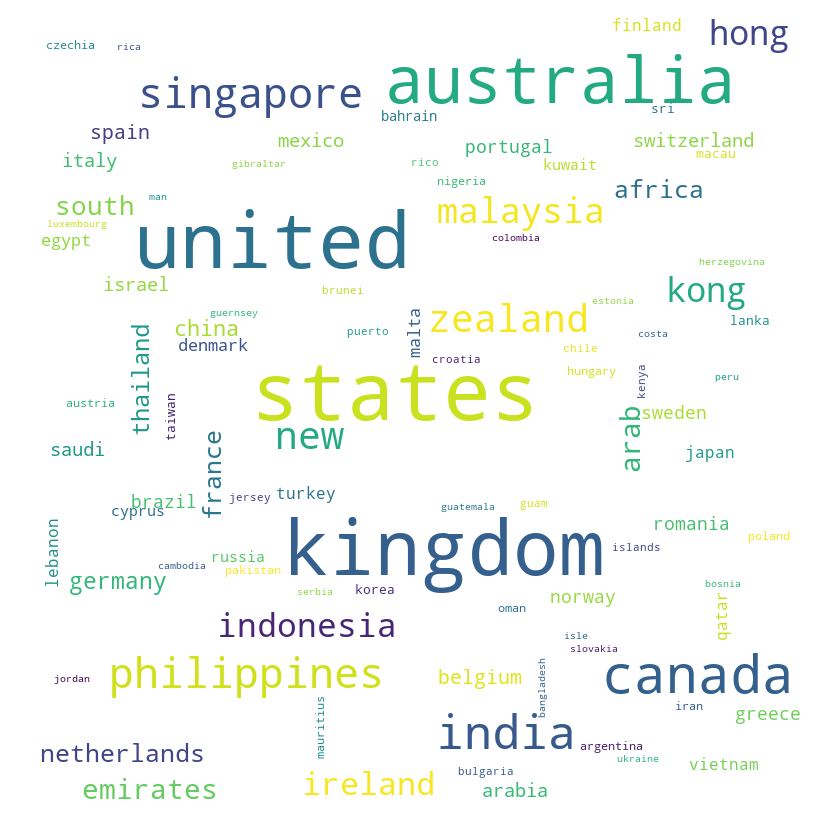

In [12]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis by Year 

In [13]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [14]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)


In [15]:
print(df)

       Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4     2019-4             Australia   
1      670682799       4     2019-5           Philippines   
2      670623270       4     2019-4  United Arab Emirates   
3      670607911       4     2019-4             Australia   
4      670607296       4     2019-4        United Kingdom   
...          ...     ...        ...                   ...   
42651    1765031       5    missing        United Kingdom   
42652    1659553       5    missing                Canada   
42653    1645894       5    missing          South Africa   
42654    1618637       4    missing         United States   
42655    1536786       4    missing        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1      Its been a while since d last time we visit HK...  Disneyland_HongKong   
2      Thanks God it was

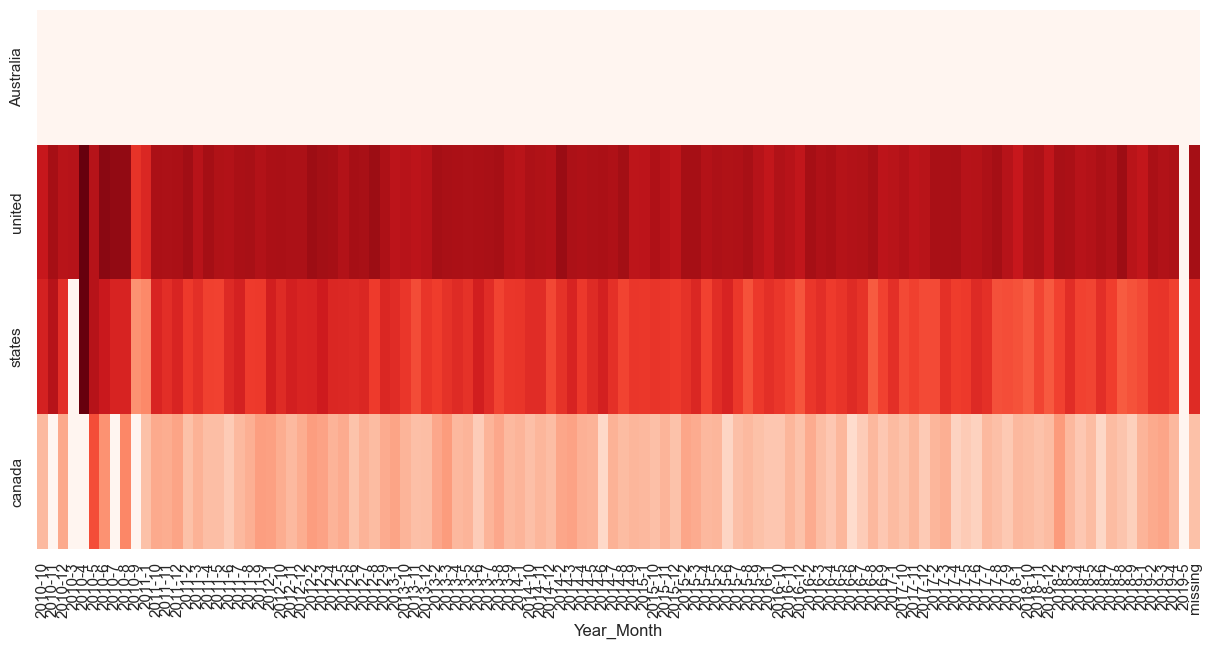

In [16]:
import seaborn as sns
keywords = ['Australia','united','states','canada']
freq_df = count_keywords_by(df, by='Year_Month', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Year_Month')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## 2019-4

In [17]:
file ="C:\\Users\\tejag\\Downloads\\DisneylandReviews.csv" 
df = pd.read_csv(file, encoding='utf-8', encoding_errors='ignore')
df= df[df['Year_Month']=='2019-4']
df.head(20)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
10,670443403,5,2019-4,United States,Disneyland never cease to amaze me! I've been ...,Disneyland_HongKong
11,670435886,5,2019-4,Canada,We spent the day here with our grown kids and ...,Disneyland_HongKong
12,670376905,4,2019-4,Australia,"We spend two days, the second day went early t...",Disneyland_HongKong


In [1]:
import seaborn as sns
keywords = ['Australia','united','states','canada']
freq_df = count_keywords_by(df, by='Year_Month', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('2019-4')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

NameError: name 'count_keywords_by' is not defined

In [18]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text 
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Reviewer_Location'].apply(prepare, pipeline=pipeline)

In [32]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
park,172
rides,169
disney,167
disneyland,135
day,127
time,115
get,99
one,78
food,74


In [19]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
united,106
states,55
kingdom,50
australia,25
canada,10
singapore,4
philippines,4
ireland,3
indonesia,2


## Wordcloud

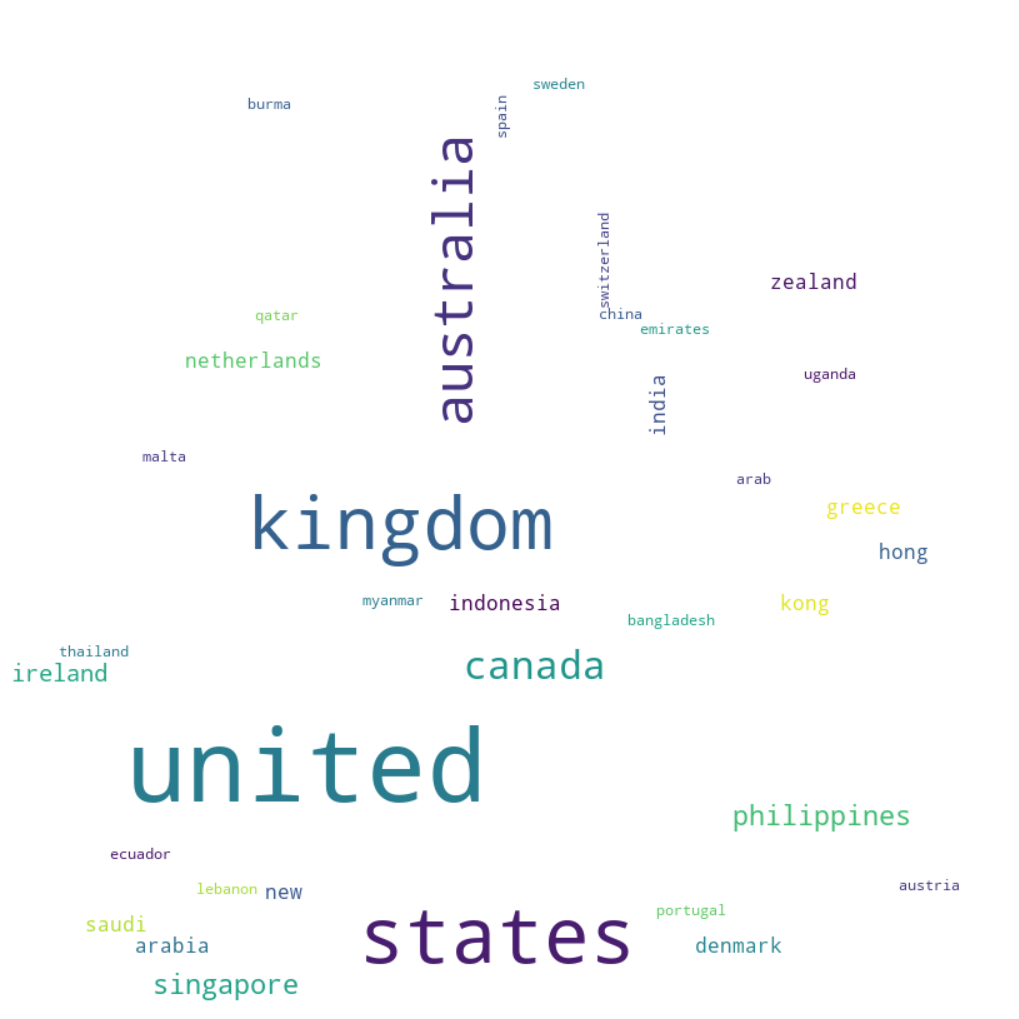

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with desired parameters
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)

# Generate word cloud from the frequency dictionary
wc.generate_from_frequencies(freq_df['freq'])

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')  # Improving interpolation for smoother image
plt.axis("off")
plt.tight_layout(pad=0)

# Saving the word cloud as an image (optional)
# plt.savefig('wordcloud.png', dpi=300)

plt.show()

In [21]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 

In [22]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
united,106,67.900165
states,55,71.317043
kingdom,50,69.599184
australia,25,52.128272
canada,10,30.014216


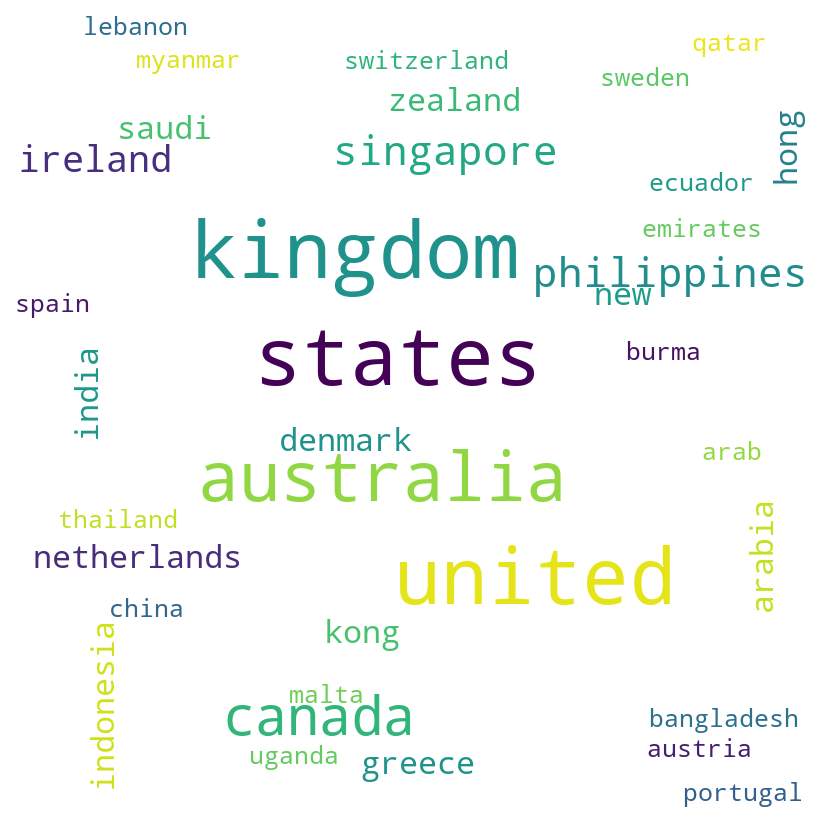

In [23]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis for year 2019-4

In [24]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [25]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

In [26]:
print(df)

       Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4     2019-4             Australia   
2      670623270       4     2019-4  United Arab Emirates   
3      670607911       4     2019-4             Australia   
4      670607296       4     2019-4        United Kingdom   
5      670591897       3     2019-4             Singapore   
...          ...     ...        ...                   ...   
29119  663804945       2     2019-4         United States   
29120  663787468       4     2019-4          Saudi Arabia   
29125  663496027       3     2019-4         United States   
29126  663015581       3     2019-4                Canada   
29127  662680415       5     2019-4        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3      HK Disneyland is 

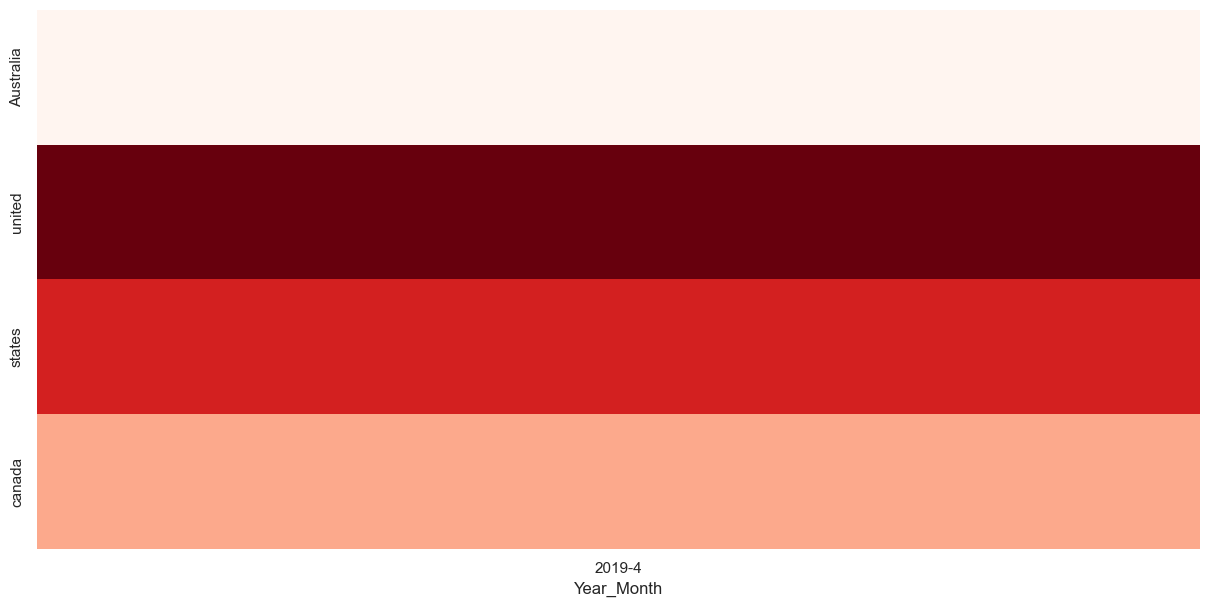

In [27]:
import seaborn as sns
keywords = ['Australia','united','states','canada']
freq_df = count_keywords_by(df, by='Year_Month', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Year_Month')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## 2018-9

In [28]:
file ="C:\\Users\\tejag\\Downloads\\DisneylandReviews.csv" 
df = pd.read_csv(file, encoding='utf-8', encoding_errors='ignore')
df= df[df['Year_Month']=='2018-9']
df.head(20)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
14,670274554,5,2018-9,Australia,This place is HUGE! Definately need more than ...,Disneyland_HongKong
38,668209978,5,2018-9,Australia,You have to visit to understand the memorable ...,Disneyland_HongKong
58,666362679,4,2018-9,United Kingdom,I visited here with my parents and 2 teenage s...,Disneyland_HongKong
66,666208969,5,2018-9,Australia,Just so friendly. Lovely food. It was Hallow...,Disneyland_HongKong
190,654157584,3,2018-9,Israel,Small Disneyland compared to Paris and the att...,Disneyland_HongKong
213,651344985,5,2018-9,Australia,Great day out .....granddaughter had an absolu...,Disneyland_HongKong
222,650783012,4,2018-9,Turkey,We chose a Chinese National holiday to visit D...,Disneyland_HongKong
225,650513695,4,2018-9,United Kingdom,We were in Hong Kong in September. The park is...,Disneyland_HongKong
466,635155975,5,2018-9,Singapore,Hong Kong Disneyland is off the beaten track d...,Disneyland_HongKong
510,631572389,4,2018-9,South Africa,Felt like a kid again. Obviously smaller than ...,Disneyland_HongKong


In [29]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text 
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Reviewer_Location'].apply(prepare, pipeline=pipeline)

In [29]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,2587
united,2571
development,1754
international,1727
world,1635
security,1391
peace,1281
people,1229
countries,1086


## Token Frequency Analysis and Visualization

## Counting The Tokens

In [30]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
united,136
states,67
kingdom,64
australia,44
new,9
zealand,9
india,8
singapore,7
canada,7


## Wordcloud

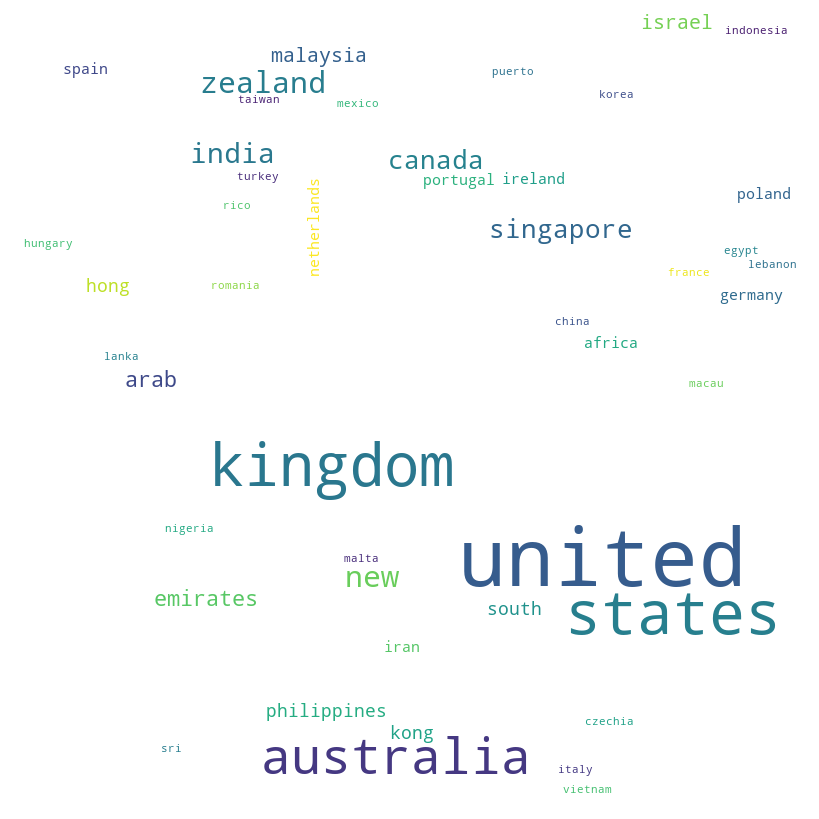

In [31]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [32]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 


In [33]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
united,136,101.731637
states,67,97.551264
kingdom,64,96.115107
australia,44,82.565648
new,9,31.171113


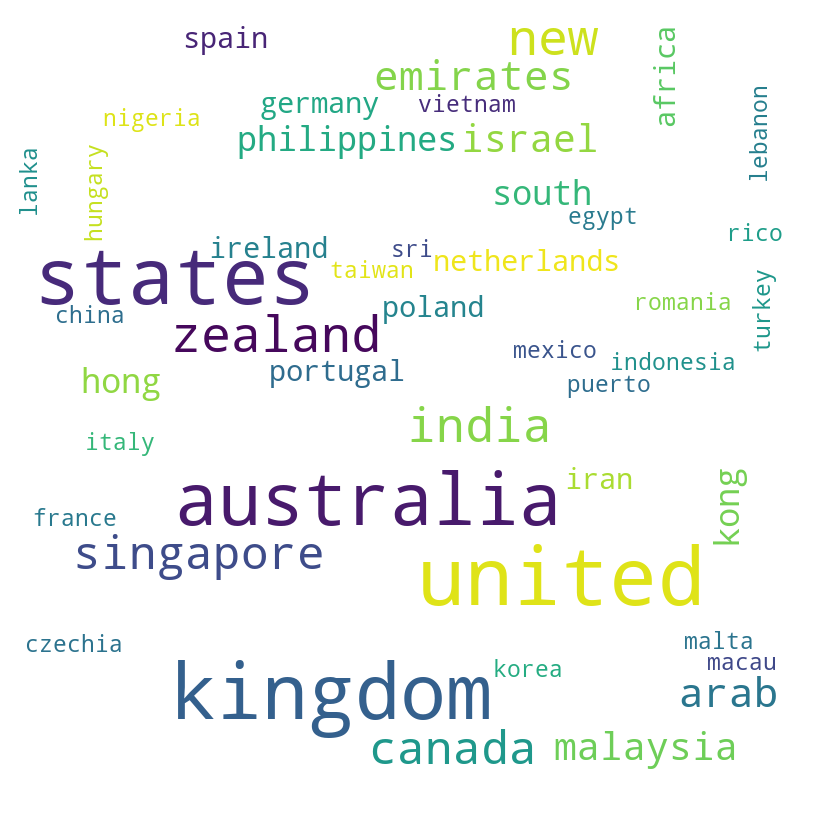

In [34]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis for Year 2018-9

In [35]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [36]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

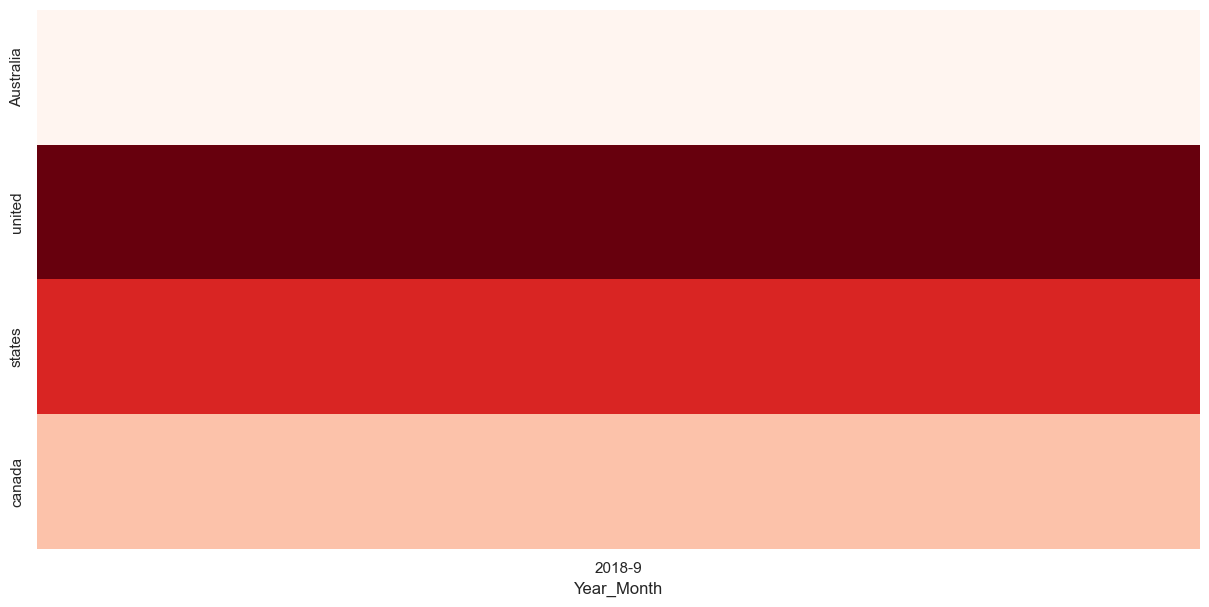

In [38]:
import seaborn as sns
keywords = ['Australia','united','states','canada']
freq_df = count_keywords_by(df, by='Year_Month', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Year_Month')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)